Unsupervised Algorithm
- Clustering
  - 1️⃣ K-means
- 차원 축소
  - 2️⃣ PCA

# Clustering
## 1️⃣ K-means
---
임의로 선택한 k개 중심점과 sample간의 거리를 통해 clustering하고, centroid 값을 update한다.

centroid가 더이상 변하지 않을 때까지 앞의 과정을 반복한다.


<br/>


목표 : KMeans를 통해 label되지 않은 과일을 분류하고, 최적의 k값을 구해보자.

(혼공 303p~315p)
### Load data

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-07-28 06:14:42--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-07-28 06:14:42--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-07-28 06:14:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import pandas as pd
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

fruits_2d.shape

(300, 10000)

### Clustering

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

clustering result

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
# cluster별 개수
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))

cluster 시각화

In [ ]:
import matplotlib.pyplot as plt

# fruits 시각화 함수
def draw_fruits(arr, ratio=1):
  # arr : 샘플 개수, 가로, 세로

  # subplot size 결정
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if 10*i + j < n:
        axs[i,j].imshow(arr[10*i + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

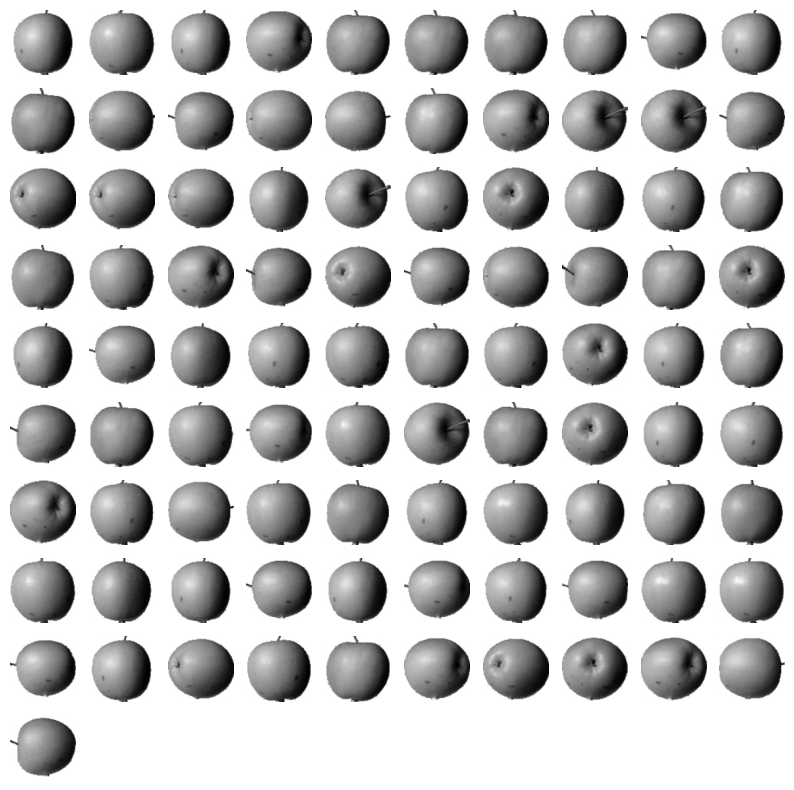

In [ ]:
draw_fruits(fruits[model.labels_ == 0])

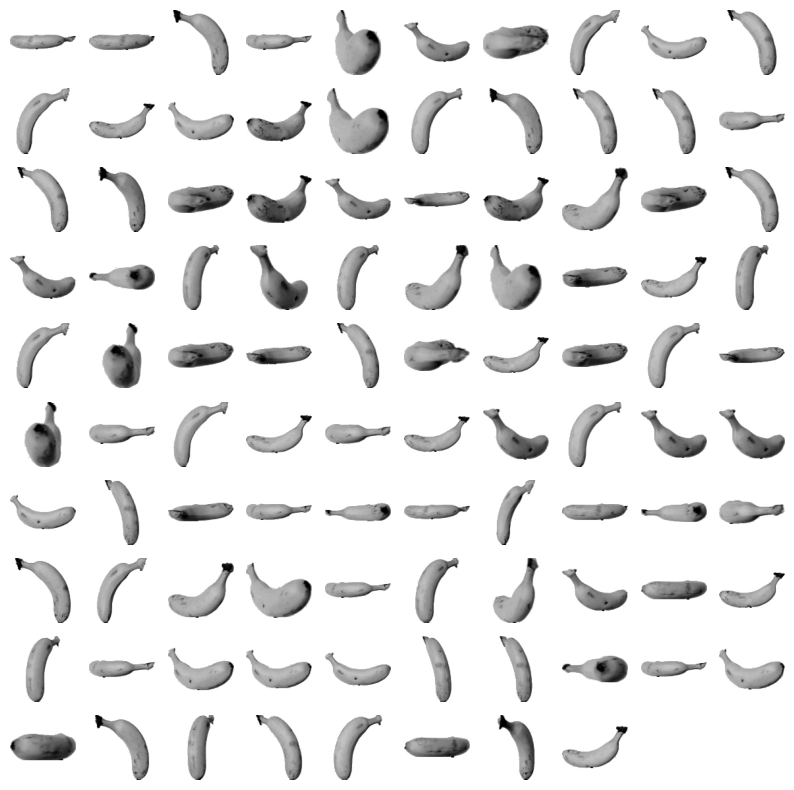

In [ ]:
draw_fruits(fruits[model.labels_==1])

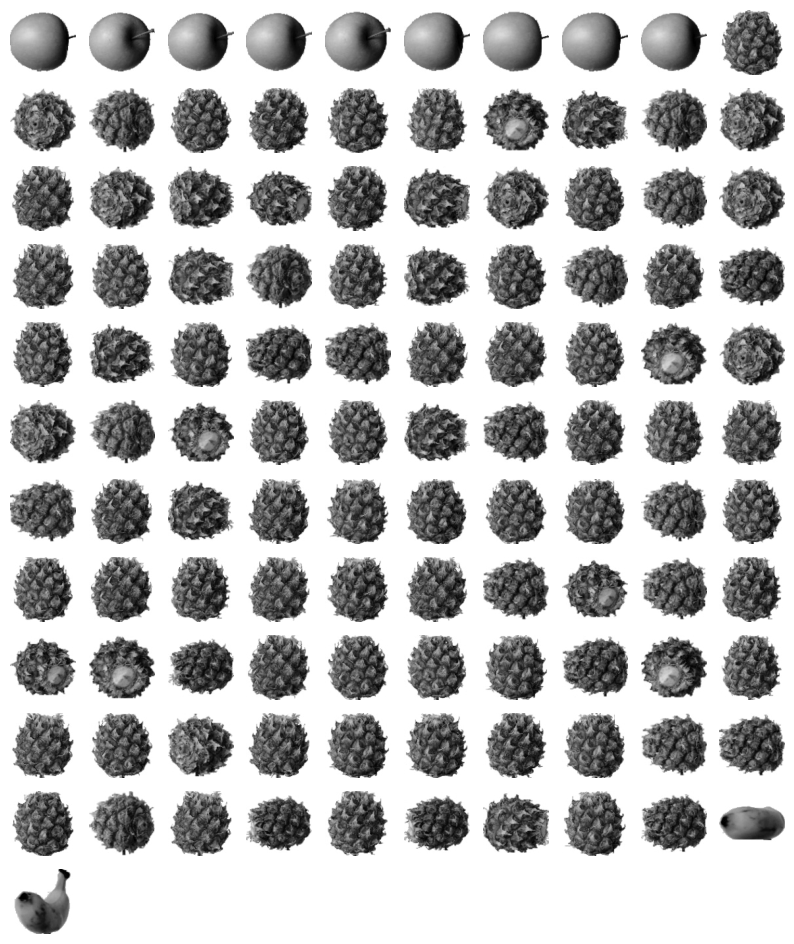

In [ ]:
draw_fruits(fruits[model.labels_==2])

### cluster centroid

시각화

(300, 10000)


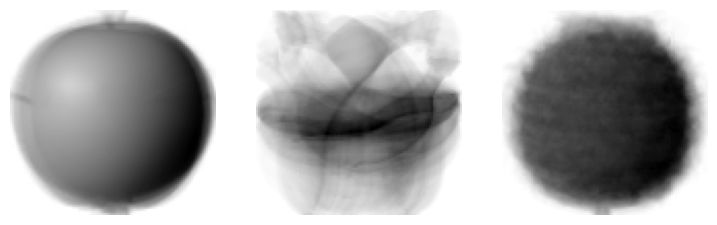

In [ ]:
# fruits_2d의 중심점
print(fruits_2d.shape)
# centroid shape (3,10000)

# centroid 시각화 -> 100x100
arr = model.cluster_centers_.reshape(-1, 100, 100)
draw_fruits(arr, ratio=3)

sample~centroid 거리

In [ ]:
# centroid까지의 거리
model.transform(fruits_2d[100:101])

array([[5267.70439881, 8837.37750892, 3393.8136117 ]])

### Predict

In [ ]:
# 예측
model.predict(fruits_2d[100:101])

array([2], dtype=int32)

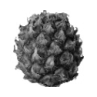

In [ ]:
draw_fruits(fruits[100:101])

## **[1️⃣-1] 최적의 k 값 찾기**
### Elbow
k값에 따른 inertia 변화량이 꺾이는 지점이 최적의 k 값이다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

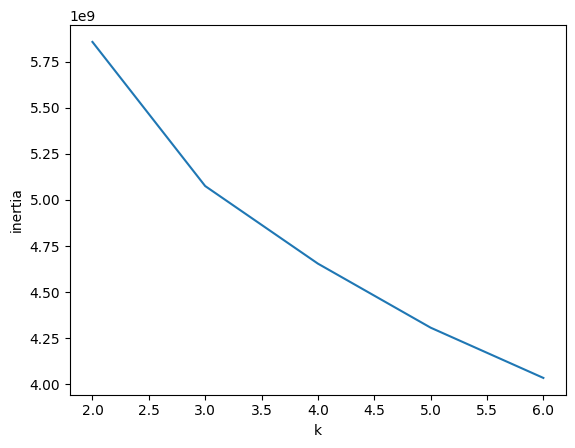

In [ ]:
inertia=[]

# k
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

위에선 k=3이 elbow 지점이다.

# 차원 축소
## 2️⃣ PCA


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

주성분

In [ ]:
pca.components_.shape

(50, 10000)

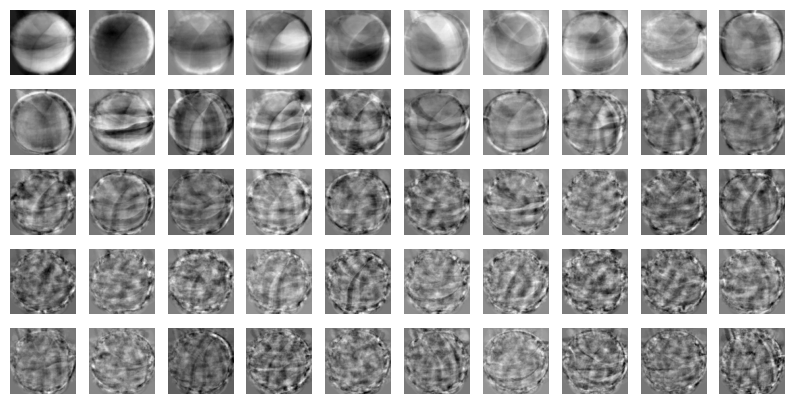

In [ ]:
# 시각화
draw_fruits(pca.components_.reshape(-1, 100, 100))

pca를 통한 차원 축소

In [ ]:
# 원본 데이터
print(fruits_2d.shape)

(300, 10000)


In [ ]:
# pca를 통해 차원 축소한 데이터
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


복원

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


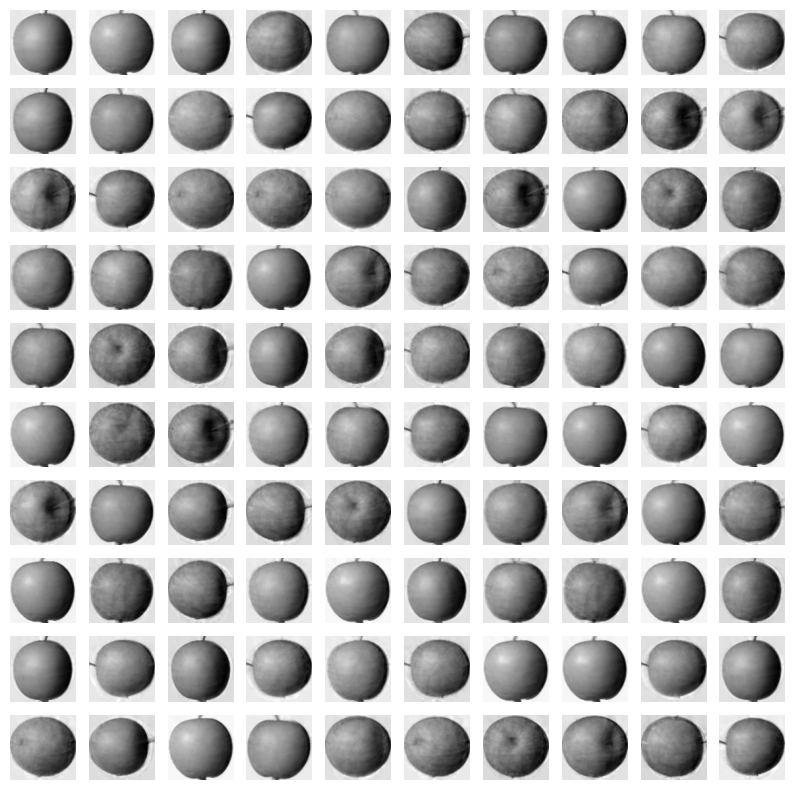

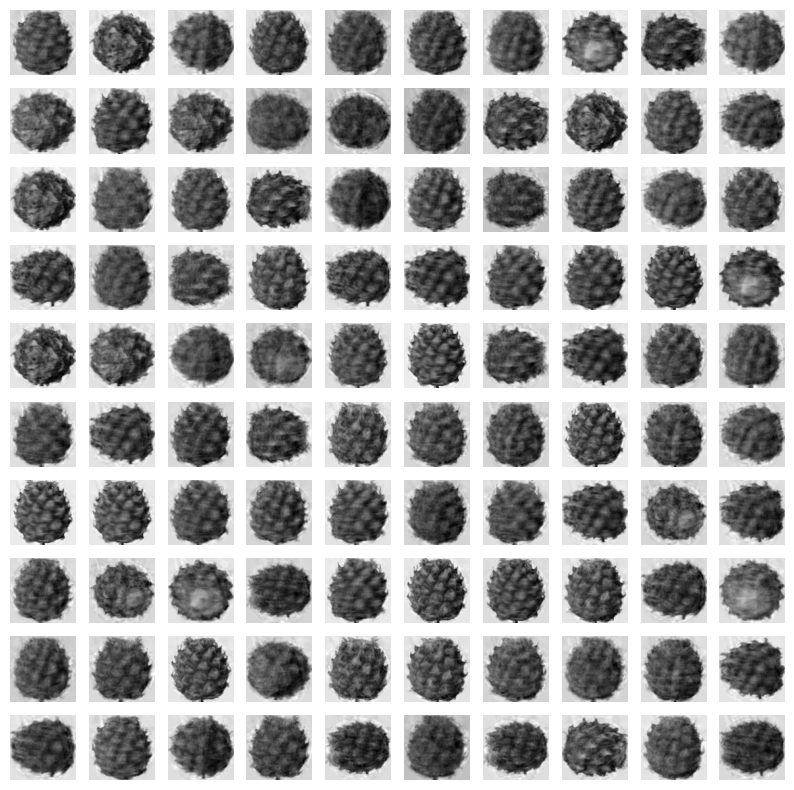

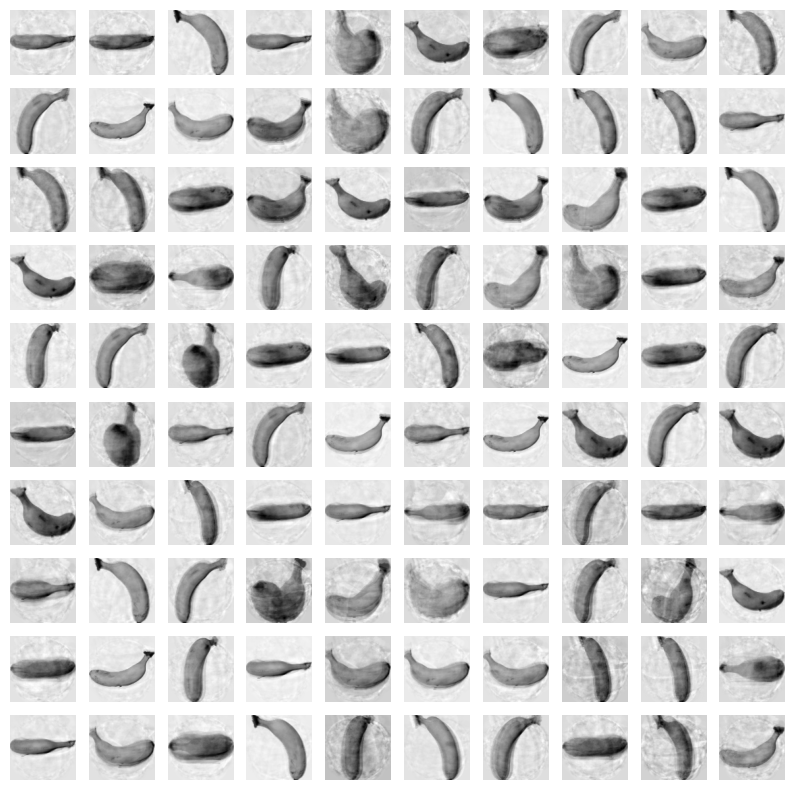

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

주성분의 원본데이터 분산 보존율

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215460933246779


주성분이 원본 데이터의 분산을 92%보존하고 있다.

앞에서 이미지 복원이 잘 되었던 이유를 여기서 알 수 있다.

### 2️⃣ -1. 적정 주성분 개수 찾기

주성분에 따른 explained_variance_ratio_ graph를 plot해서 적절한 주성분 개수는 몇 개일지 알아보자.

In [ ]:
print(pca.components_.shape)
print(pca.explained_variance_ratio_.shape)

(50, 10000)
(50,)


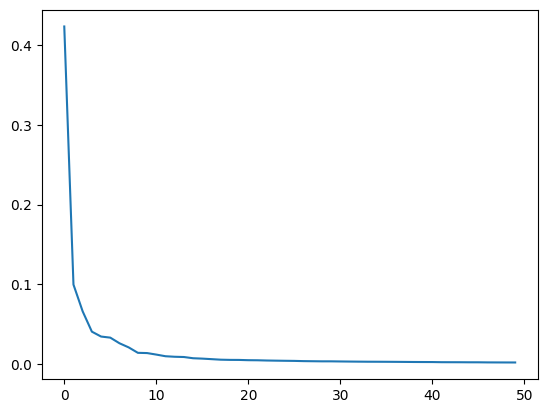

In [ ]:
plt.plot(range(50), pca.explained_variance_ratio_)
plt.ylabel('explained variance ratio')
plt.show()

그래프를 통해 10개의 주성분이 대부분의 분산을 나타내고, 그 이상의 주성분이 표현하는 분산은 미미하다는 것을 알 수 있다.



### 2️⃣ -2. 차원 축소된 data를 통한 supervised model 성능 비교

원본 데이터와 pca로 차원 축소한 데이터를 지도학습인 Logistic Regression과 비지도 학습인 KMeans에 적용하고, 성능 차이를 비교해 보자.

- Logistic Regression

In [ ]:
# 원본데이터: frutis_2d
# 차원 축소 데이터 : fruits_pca

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

### Target 정의

fruits_2d는 사과 100개, 파인애플 100개, 바나나 100개 순으로 데이터가 들어있다는 것을 안다.

이에 따라 target variable을 정의한다.

In [ ]:
# target label 정의
# 0 : apple, 1: pineapple, 2: banana
target = np.array([0]*100 + [1]*100 + [2]*100)

### 성능 평가

훈련 시간 및 모델 성능을 비교를 해보자.

## 1) Original Data

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print('[[Original : Fruits_2d]]')
print(f'점수: {np.mean(scores["test_score"])}, 훈련 시간: {np.mean(scores["fit_time"])}')

[[Original : Fruits_2d]]
점수: 0.9966666666666667, 훈련 시간: 1.8487735748291017


## 2) PCA Data

### 2-1) pc 50

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print('[[PCA Data (PC: 50) : Fruits_pca]]')
print(f'점수: {np.mean(scores["test_score"])}, 훈련 시간: {np.mean(scores["fit_time"])}')

[[PCA Data : Fruits_pca]]
점수: 1.0, 훈련 시간: 0.017704582214355467


놀랍다. 정확도가 100%인데 훈련시간은 100배이상 차이난다.

여기서 PCA의 효력을 알 수 있다. 차원 축소를 하면 저장 공간을 아낄 뿐 아니라, 머신러닝 훈련 속도를 높일 수 있다.

### 2-2) pc 2

Explained Variance Ratio를 통해 주성분 지정

In [48]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

# 주성분 개수
print(pca.n_components_)

2


In [49]:
# feature reduction
fruits_pca_2 = pca.transform(fruits_2d)
print(fruits_pca_2.shape)

(300, 2)


- Logistic Regression

In [50]:
# pc 2 성능 평가
scores = cross_validate(lr, fruits_pca_2, target, n_jobs=-1)
print('[[PCA Data (PC: 2) : Fruits_pca]]')
print(f'점수: {np.mean(scores["test_score"])}, 훈련 시간: {np.mean(scores["fit_time"])}')

[[PCA Data (PC: 2) : Fruits_pca]]
점수: 0.9933333333333334, 훈련 시간: 0.05023193359375


2개의 PC만으로도 99%의 정확도를 보인다.

- KMeans


In [54]:
km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_pca_2)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


PC가 2개임에도, 앞의 원본 데이터로 진행했던 Kmeans 결과와 비슷한 결과가 나옴을 확인 할 수 있다.

시각화

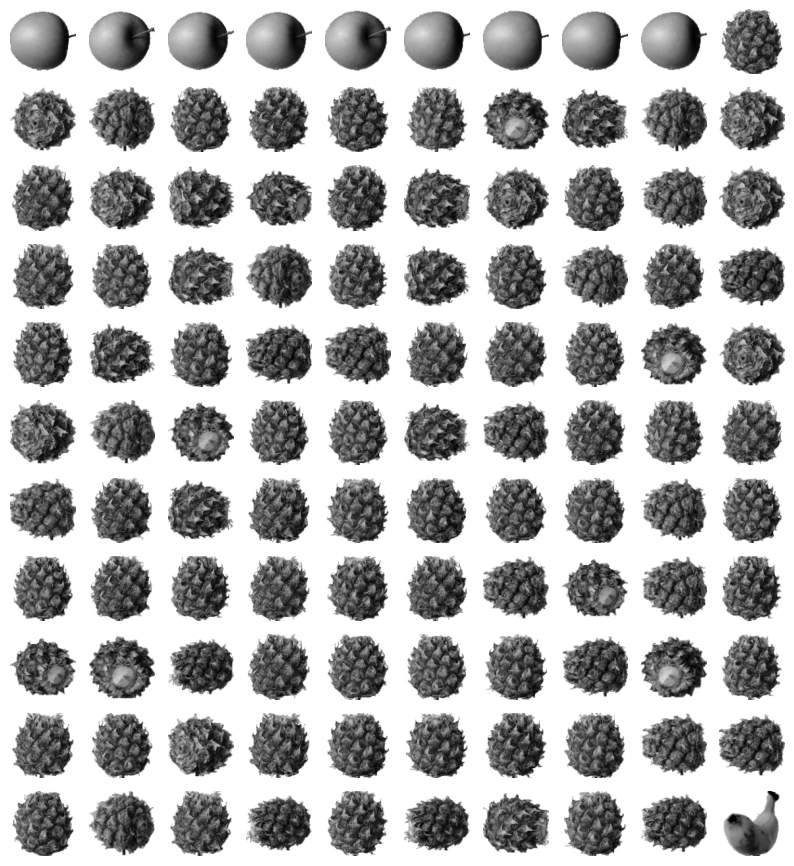

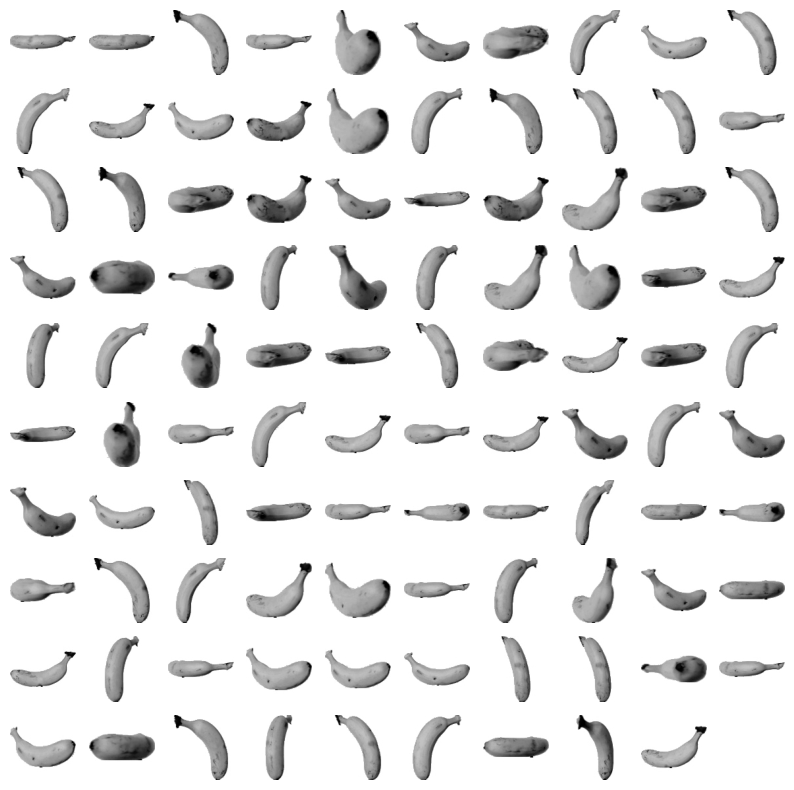

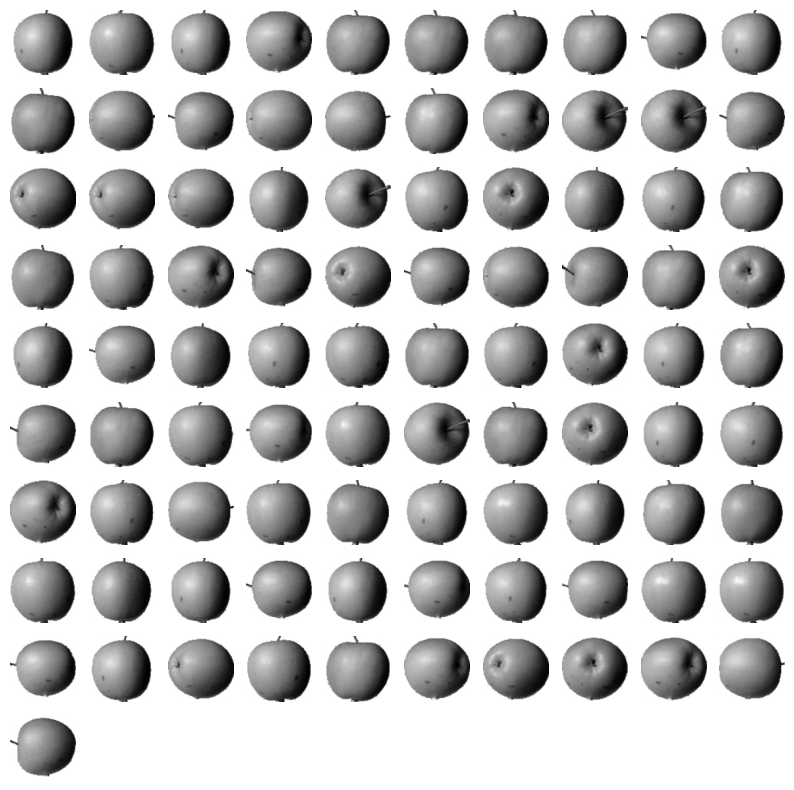

In [55]:
for i in range(3):
  draw_fruits(fruits[km.labels_==i])
  print("\n")

In [56]:
fruits_pca_2.shape

(300, 2)

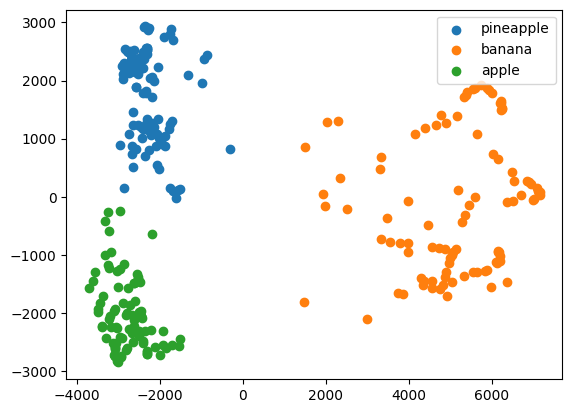

In [60]:
# cluster 별 scatter plot
for i in range(3):
  data = fruits_pca_2[km.labels_ == i]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

산점도를 통해 pc가 2개임에도 cluster별로 잘 분류가 되었음을 다시 한번 확인할 수 있다.

apple과 pineapple cluster가 서로 가깝기 때문에 모델이 혼동하는 것 또한 확인할 수 있다.